<a href="https://colab.research.google.com/github/e-k-a/AI/blob/main/%D0%BB%D0%B0%D0%B12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.optimizers.legacy import Adam, RMSprop, SGD
from tensorflow.keras import activations
from tensorflow.keras.layers import ReLU


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

try:
    import scikeras
except ImportError:
    !python -m pip install scikeras
from scikeras.wrappers import KerasRegressor

from scikeras.wrappers import KerasClassifier
import pandas as pd
import seaborn as sns

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train / 255
x_test = x_test / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


x_train, x_valid, y_train_cat, y_valid = train_test_split(x_train, y_train_cat, test_size=10000, random_state=42)

In [ ]:
x_train_20000, _, y_train_20000, _ = train_test_split(x_train, y_train_cat, train_size=20000, random_state=42)

In [ ]:
def create_model(optimizer=Adam(), activation='relu',loss = 'categorical_crossentropy', bias=True):
    model = keras.Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation=activation, use_bias=bias),
        Dropout(0.2),
        Dense(10, activation='softmax', use_bias=bias)
    ])
    model.compile(optimizer=optimizer,
             loss=loss,
             metrics=['accuracy'])
    return model


In [ ]:
model =  create_model()

In [ ]:
print(model.summary())

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 128)               100480    
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3279 - accuracy: 0.9051 - val_loss: 0.1625 - val_accuracy: 0.9527
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1554 - accuracy: 0.9548 - val_loss: 0.1193 - val_accuracy: 0.9654
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1176 - accuracy: 0.9645 - val_loss: 0.0938 - val_accuracy: 0.9716
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0941 - accuracy: 0.9711 - val_loss: 0.0848 - val_accuracy: 0.9741
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0814 - accuracy: 0.9746 - val_loss: 0.0779 - val_accuracy: 0.9765
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0693 - accuracy: 0.9779 - val_loss: 0.0747 - val_accuracy: 0.9761
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0602 - accuracy: 0.9806 - val_loss: 0.0721 - val_accuracy:

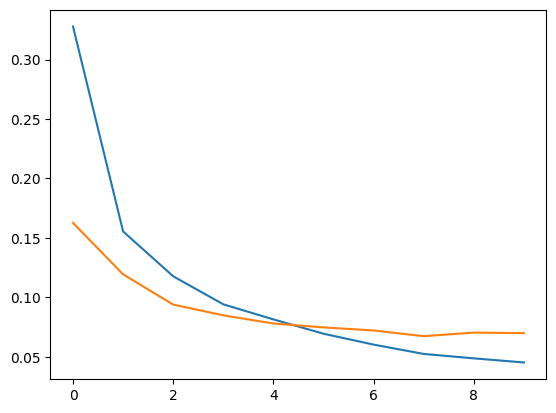

313/313 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9791


[0.07563910633325577, 0.9790999889373779]

In [ ]:
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))


plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

model.evaluate(x_test, y_test_cat)

In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0701 - accuracy: 0.9805


[0.07012496143579483, 0.9804999828338623]

313/313 [==============================] - 1s 4ms/step
(10000,)
[7 2 1 0 4]
[7 2 1 0 4]
Значение сети: 8


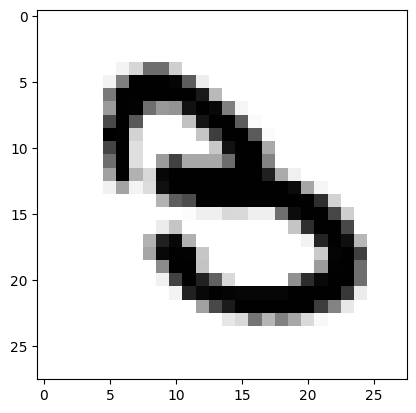

Значение сети: 8


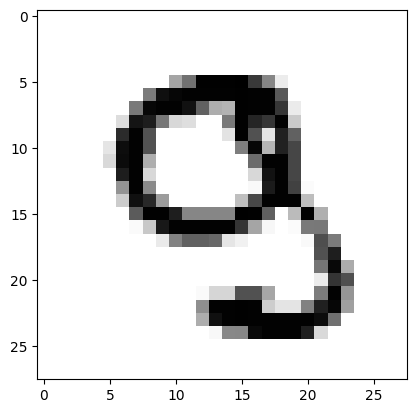

Значение сети: 2


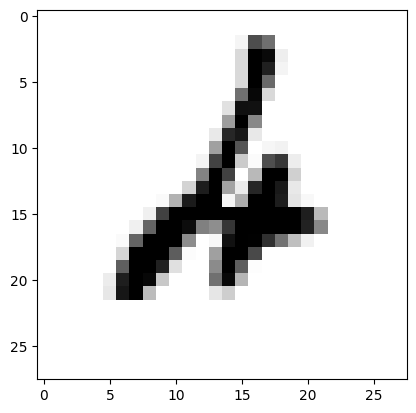

Значение сети: 0


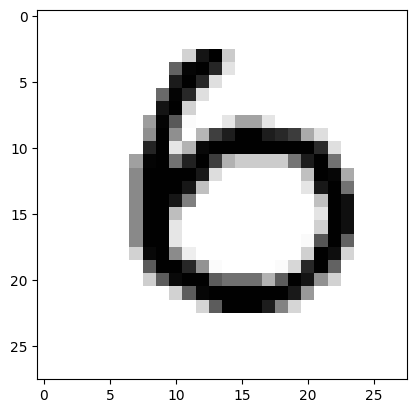

Значение сети: 7


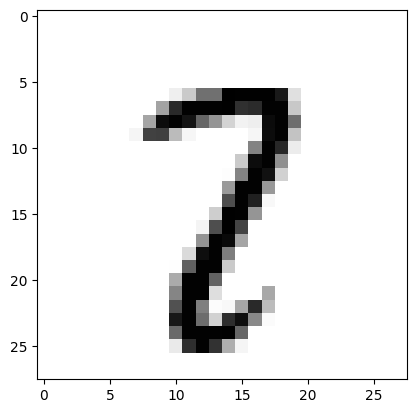

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:5])
print(y_test[:5])

mask = pred == y_test

x_false = x_test[~mask]
y_false = x_test[~mask]
p_false = pred[~mask]

for i in range(5):
    print("Значение сети: "+str(p_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()

In [ ]:
5his_20000 = model.fit(x_train_20000, y_train_20000, batch_size=32, epochs=5, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test_cat)

Epoch 1/5
625/625 [==============================] - 4s 7ms/step - loss: 0.0392 - accuracy: 0.9866 - val_loss: 0.0687 - val_accuracy: 0.9801
Epoch 2/5
625/625 [==============================] - 2s 3ms/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0723 - val_accuracy: 0.9807
Epoch 3/5
625/625 [==============================] - 2s 4ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0769 - val_accuracy: 0.9778
Epoch 4/5
625/625 [==============================] - 2s 4ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0744 - val_accuracy: 0.9807
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.9791


[0.07795882225036621, 0.9790999889373779]

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2476 - accuracy: 0.9258 - val_loss: 0.1290 - val_accuracy: 0.9597
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1365 - accuracy: 0.9592 - val_loss: 0.0979 - val_accuracy: 0.9704
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1093 - accuracy: 0.9671 - val_loss: 0.0875 - val_accuracy: 0.9731
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0927 - accuracy: 0.9716 - val_loss: 0.0824 - val_accuracy: 0.9755
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0798 - accuracy: 0.9751 - val_loss: 0.0790 - val_accuracy: 0.9748
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0701 - accuracy: 0.9779 - val_loss: 0.0746 - val_accuracy: 0.9776
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0633 - accuracy: 0.9795 - val_loss: 0.0734 - val_accuracy:

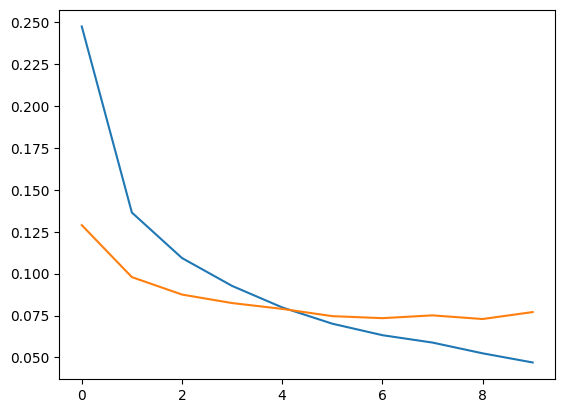

313/313 [==============================] - 3s 8ms/step - loss: 0.0784 - accuracy: 0.9766


[0.07837583869695663, 0.9765999913215637]

In [ ]:
model =  create_model()
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))


plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

model.evaluate(x_test, y_test_cat)

In [ ]:
model = KerasClassifier(model=create_model, verbose=1)

### 4

In [ ]:
param_grid = {

    'optimizer': [Adam(learning_rate=0.01), Adam(learning_rate=0.1),Adam(learning_rate=0.15),
                  RMSprop(learning_rate=0.01), RMSprop(learning_rate=0.1) ,RMSprop(learning_rate=0.15),
                  SGD(learning_rate=0.01), SGD(learning_rate=0.1) ,SGD(learning_rate=0.15),
                  ]
}

In [ ]:
def gridSearch(param_grid):
  grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
  grid_result = grid.fit(x_train, y_train_cat, validation_data=(x_valid, y_valid))
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

  results = pd.DataFrame(grid_result.cv_results_)
  return results

In [ ]:
gridSearch(param_grid= param_grid)

1563/1563 [==============================] - 8s 5ms/step - loss: 0.2523 - accuracy: 0.9238 - val_loss: 0.1303 - val_accuracy: 0.9596
Best: 0.953060 using {'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x7d3642a13eb0>}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,10.089273,0.601086,2.127103,0.553893,<keras.src.optimizers.legacy.adam.Adam object ...,{'optimizer': <keras.src.optimizers.legacy.ada...,0.953681,0.949301,0.949958,0.95098,0.001929,7
1,10.070284,2.502161,3.157453,0.293532,<keras.src.optimizers.legacy.adam.Adam object ...,{'optimizer': <keras.src.optimizers.legacy.ada...,0.952421,0.948401,0.953558,0.95146,0.002212,6
2,8.224200,2.930030,3.817785,1.310904,<keras.src.optimizers.legacy.adam.Adam object ...,{'optimizer': <keras.src.optimizers.legacy.ada...,0.954221,0.950501,0.954038,0.95292,0.001712,3
3,9.731155,1.003545,2.562148,0.636731,<keras.src.optimizers.legacy.rmsprop.RMSprop o...,{'optimizer': <keras.src.optimizers.legacy.rms...,0.949061,0.950141,0.952058,0.95042,0.001239,9
4,10.721054,3.132642,3.806868,1.713339,<keras.src.optimizers.legacy.rmsprop.RMSprop o...,{'optimizer': <keras.src.optimizers.legacy.rms...,0.952781,0.947561,0.951878,0.95074,0.002278,8
5,9.766122,1.479254,2.979319,0.045075,<keras.src.optimizers.legacy.rmsprop.RMSprop o...,{'optimizer': <keras.src.optimizers.legacy.rms...,0.953861,0.952601,0.952718,0.95306,0.000568,1
6,11.504004,0.620576,2.426509,0.671364,<keras.src.optimizers.legacy.gradient_descent....,{'optimizer': <keras.src.optimizers.legacy.gra...,0.953741,0.950081,0.951578,0.95180,0.001502,4
7,10.510165,3.054700,3.534723,1.537276,<keras.src.optimizers.legacy.gradient_descent....,{'optimizer': <keras.src.optimizers.legacy.gra...,0.953441,0.949661,0.952058,0.95172,0.001562,5
8,9.309137,2.542958,3.300574,1.629869,<keras.src.optimizers.legacy.gradient_descent....,{'optimizer': <keras.src.optimizers.legacy.gra...,0.956861,0.949181,0.953018,0.95302,0.003135,2


### 5

In [ ]:
for act in ['relu', 'softmax', 'linear','tanh']:
  model =  create_model(activation=act)
  his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))

  print(act,' ',model.evaluate(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2521 - accuracy: 0.9242 - val_loss: 0.1344 - val_accuracy: 0.9606
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1411 - accuracy: 0.9577 - val_loss: 0.1091 - val_accuracy: 0.9673
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1093 - accuracy: 0.9676 - val_loss: 0.0911 - val_accuracy: 0.9717
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0925 - accuracy: 0.9715 - val_loss: 0.0843 - val_accuracy: 0.9745
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0792 - accuracy: 0.9754 - val_loss: 0.0813 - val_accuracy: 0.9762
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0720 - accuracy: 0.9770 - val_loss: 0.0766 - val_accuracy: 0.9786
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0647 - accuracy: 0.9792 - val_loss: 0.0763 - val_accuracy

### 7

In [ ]:
model =  create_model(loss='mean_squared_error')
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0122 - accuracy: 0.9194 - val_loss: 0.0069 - val_accuracy: 0.9539
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0070 - accuracy: 0.9558 - val_loss: 0.0054 - val_accuracy: 0.9644
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0057 - accuracy: 0.9642 - val_loss: 0.0048 - val_accuracy: 0.9674
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0050 - accuracy: 0.9681 - val_loss: 0.0045 - val_accuracy: 0.9706
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0044 - accuracy: 0.9720 - val_loss: 0.0041 - val_accuracy: 0.9741
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0040 - accuracy: 0.9746 - val_loss: 0.0042 - val_accuracy: 0.9707
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0037 - accuracy: 0.9771 - val_loss: 0.0041 - val_accurac

[0.0036654029972851276, 0.9767000079154968]

In [ ]:
model =  create_model(loss='binary_crossentropy')
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0581 - accuracy: 0.9108 - val_loss: 0.0340 - val_accuracy: 0.9491
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0354 - accuracy: 0.9484 - val_loss: 0.0265 - val_accuracy: 0.9616
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0299 - accuracy: 0.9577 - val_loss: 0.0241 - val_accuracy: 0.9656
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0261 - accuracy: 0.9633 - val_loss: 0.0219 - val_accuracy: 0.9693
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0235 - accuracy: 0.9685 - val_loss: 0.0211 - val_accuracy: 0.9700
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0216 - accuracy: 0.9713 - val_loss: 0.0196 - val_accuracy: 0.9715
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0204 - accuracy: 0.9732 - val_loss: 0.0199 - val_accuracy:

[0.01849662885069847, 0.9746000170707703]

### 6

In [ ]:
model =  create_model(bias=False)
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2493 - accuracy: 0.9259 - val_loss: 0.1318 - val_accuracy: 0.9590
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1346 - accuracy: 0.9609 - val_loss: 0.1005 - val_accuracy: 0.9694
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1066 - accuracy: 0.9682 - val_loss: 0.0863 - val_accuracy: 0.9735
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0884 - accuracy: 0.9724 - val_loss: 0.0823 - val_accuracy: 0.9761
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0768 - accuracy: 0.9750 - val_loss: 0.0793 - val_accuracy: 0.9753
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0641 - accuracy: 0.9795 - val_loss: 0.0750 - val_accuracy: 0.9770
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0620 - accuracy: 0.9797 - val_loss: 0.0697 - val_accuracy:

[0.07212118059396744, 0.9794999957084656]

In [ ]:
model =  create_model()
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.2540 - accuracy: 0.9225 - val_loss: 0.1283 - val_accuracy: 0.9610
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1393 - accuracy: 0.9579 - val_loss: 0.1061 - val_accuracy: 0.9670
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1113 - accuracy: 0.9668 - val_loss: 0.0901 - val_accuracy: 0.9719
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0939 - accuracy: 0.9713 - val_loss: 0.0824 - val_accuracy: 0.9754
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0827 - accuracy: 0.9741 - val_loss: 0.0795 - val_accuracy: 0.9767
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0720 - accuracy: 0.9768 - val_loss: 0.0777 - val_accuracy: 0.9765
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0659 - accuracy: 0.9794 - val_loss: 0.0744 - val_accuracy:

[0.07040101289749146, 0.9793000221252441]

### 8

In [ ]:
batch_sizes = [16, 32, 64, 128, 256]
score = []
for batch_size in batch_sizes:
    model = create_model()
    model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=10, validation_data=(x_valid, y_valid))
    score.append({batch_size: model.evaluate(x_test, y_test, verbose=0)})

Epoch 1/10
3125/3125 [==============================] - 13s 4ms/step - loss: 0.2429 - accuracy: 0.9279 - val_loss: 0.1343 - val_accuracy: 0.9591
Epoch 2/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.1363 - accuracy: 0.9589 - val_loss: 0.1172 - val_accuracy: 0.9643
Epoch 3/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.1082 - accuracy: 0.9666 - val_loss: 0.0908 - val_accuracy: 0.9705
Epoch 4/10
3125/3125 [==============================] - 11s 4ms/step - loss: 0.0892 - accuracy: 0.9717 - val_loss: 0.0830 - val_accuracy: 0.9737
Epoch 5/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.0777 - accuracy: 0.9753 - val_loss: 0.0805 - val_accuracy: 0.9766
Epoch 6/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0683 - accuracy: 0.9786 - val_loss: 0.0766 - val_accuracy: 0.9767
Epoch 7/10
3125/3125 [==============================] - 11s 3ms/step - loss: 0.0604 - accuracy: 0.9806 - val_loss: 0.0802 - val_accu

In [ ]:
score

[[0.08473537862300873, 0.9771000146865845],
 [0.0789092630147934, 0.9786999821662903],
 [0.07210922241210938, 0.979200005531311],
 [0.07181189209222794, 0.9775000214576721],
 [0.07194362580776215, 0.9769999980926514]]

1/1 [==============================] - 0s 82ms/step
5


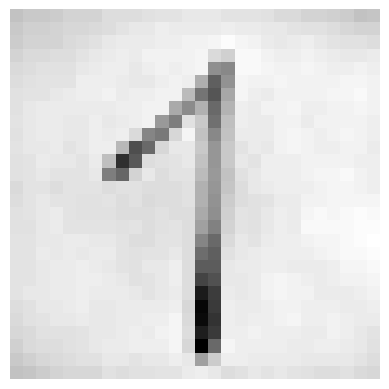

In [ ]:
from PIL import Image
from keras.models import load_model

image_path = '1.png'
image = Image.open(image_path).convert('L')
image = image.resize((28, 28))
image = np.array(image) / 255.0
image = np.reshape(image, (1, 28, 28))

print(np.argmax(model.predict(image)))

plt.imshow(image[0], cmap='gray')
plt.axis('off')
plt.show()